In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('dataset.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [11]:
# Basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [12]:
print(df.describe())


               AGE      SMOKING  YELLOW_FINGERS      ANXIETY  PEER_PRESSURE  \
count  3000.000000  3000.000000     3000.000000  3000.000000    3000.000000   
mean     55.169000     1.491000        1.514000     1.494000       1.499000   
std      14.723746     0.500002        0.499887     0.500047       0.500082   
min      30.000000     1.000000        1.000000     1.000000       1.000000   
25%      42.000000     1.000000        1.000000     1.000000       1.000000   
50%      55.000000     1.000000        2.000000     1.000000       1.000000   
75%      68.000000     2.000000        2.000000     2.000000       2.000000   
max      80.000000     2.000000        2.000000     2.000000       2.000000   

       CHRONIC_DISEASE      FATIGUE      ALLERGY     WHEEZING  \
count      3000.000000  3000.000000  3000.000000  3000.000000   
mean          1.509667     1.489667     1.506667     1.497333   
std           0.499990     0.499977     0.500039     0.500076   
min           1.000000     1

In [13]:
# Check for missing values
print(df.isnull().sum())

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64


In [14]:
# Check for duplicates
print(df.duplicated().sum()) #2 Duplicates

2


In [24]:
# Duplicate Rows
df[df.duplicated()]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
1476,M,53,1,2,2,2,2,1,1,1,1,2,2,1,2,NO
2039,M,50,1,1,1,2,1,2,1,2,2,2,2,1,2,YES


In [26]:
#dropped duplicates
df.drop_duplicates(inplace=True)

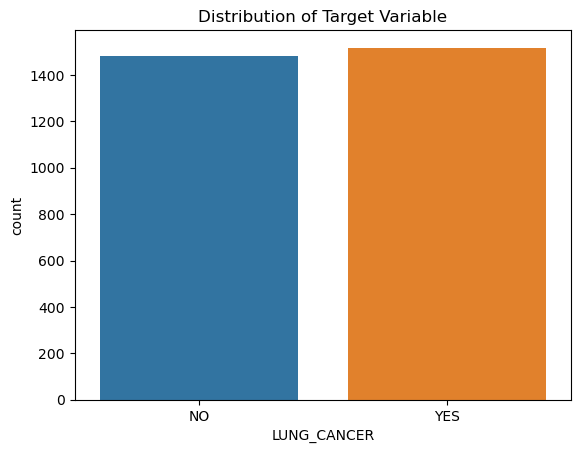

In [29]:
# Lung_Cancer Count
#Univariate Analysis
sns.countplot(x='LUNG_CANCER', data=df)
plt.title('Distribution of Target Variable')
plt.show()

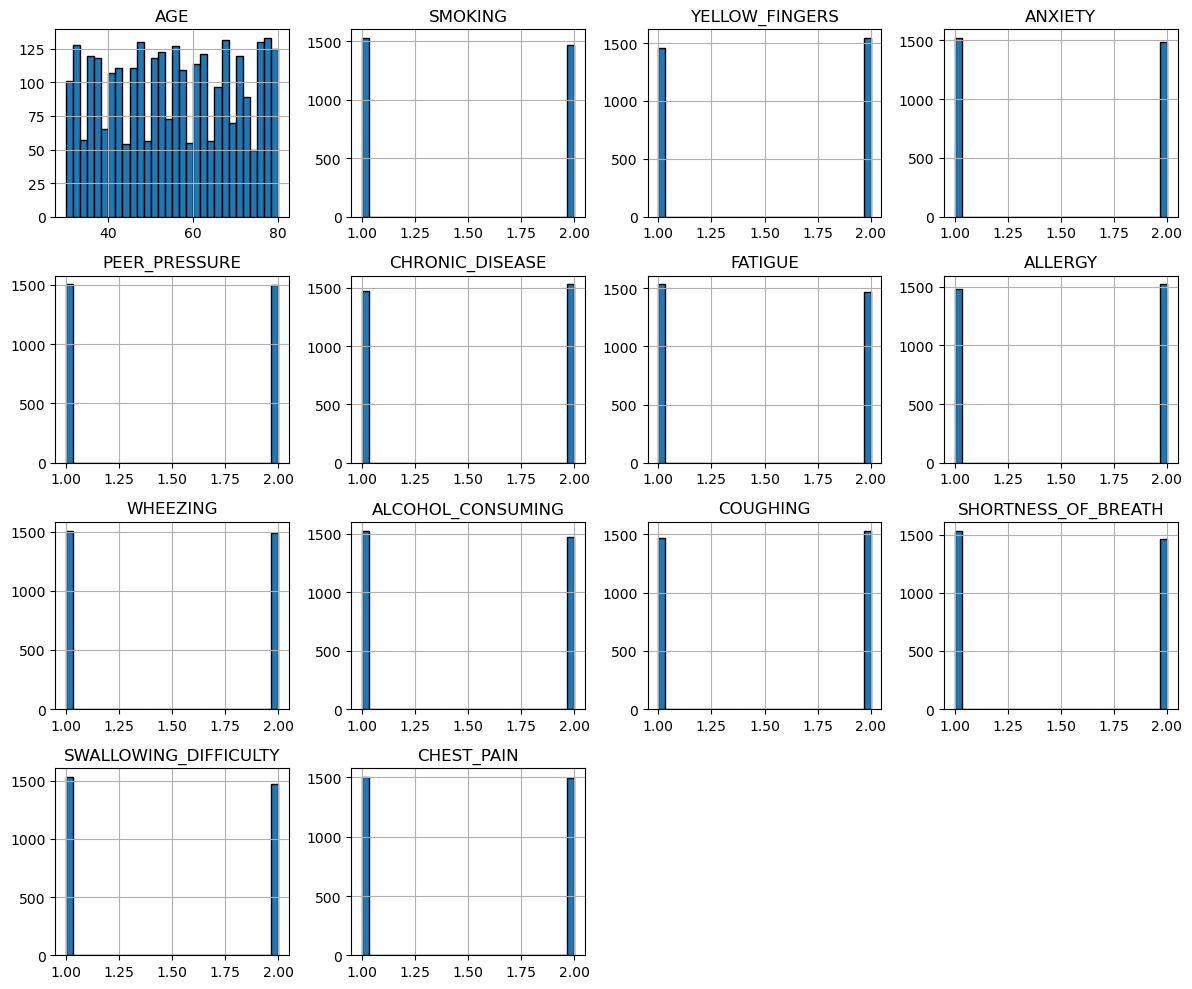

In [16]:
#Multivariate Analysis
# Histograms for numeric features
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

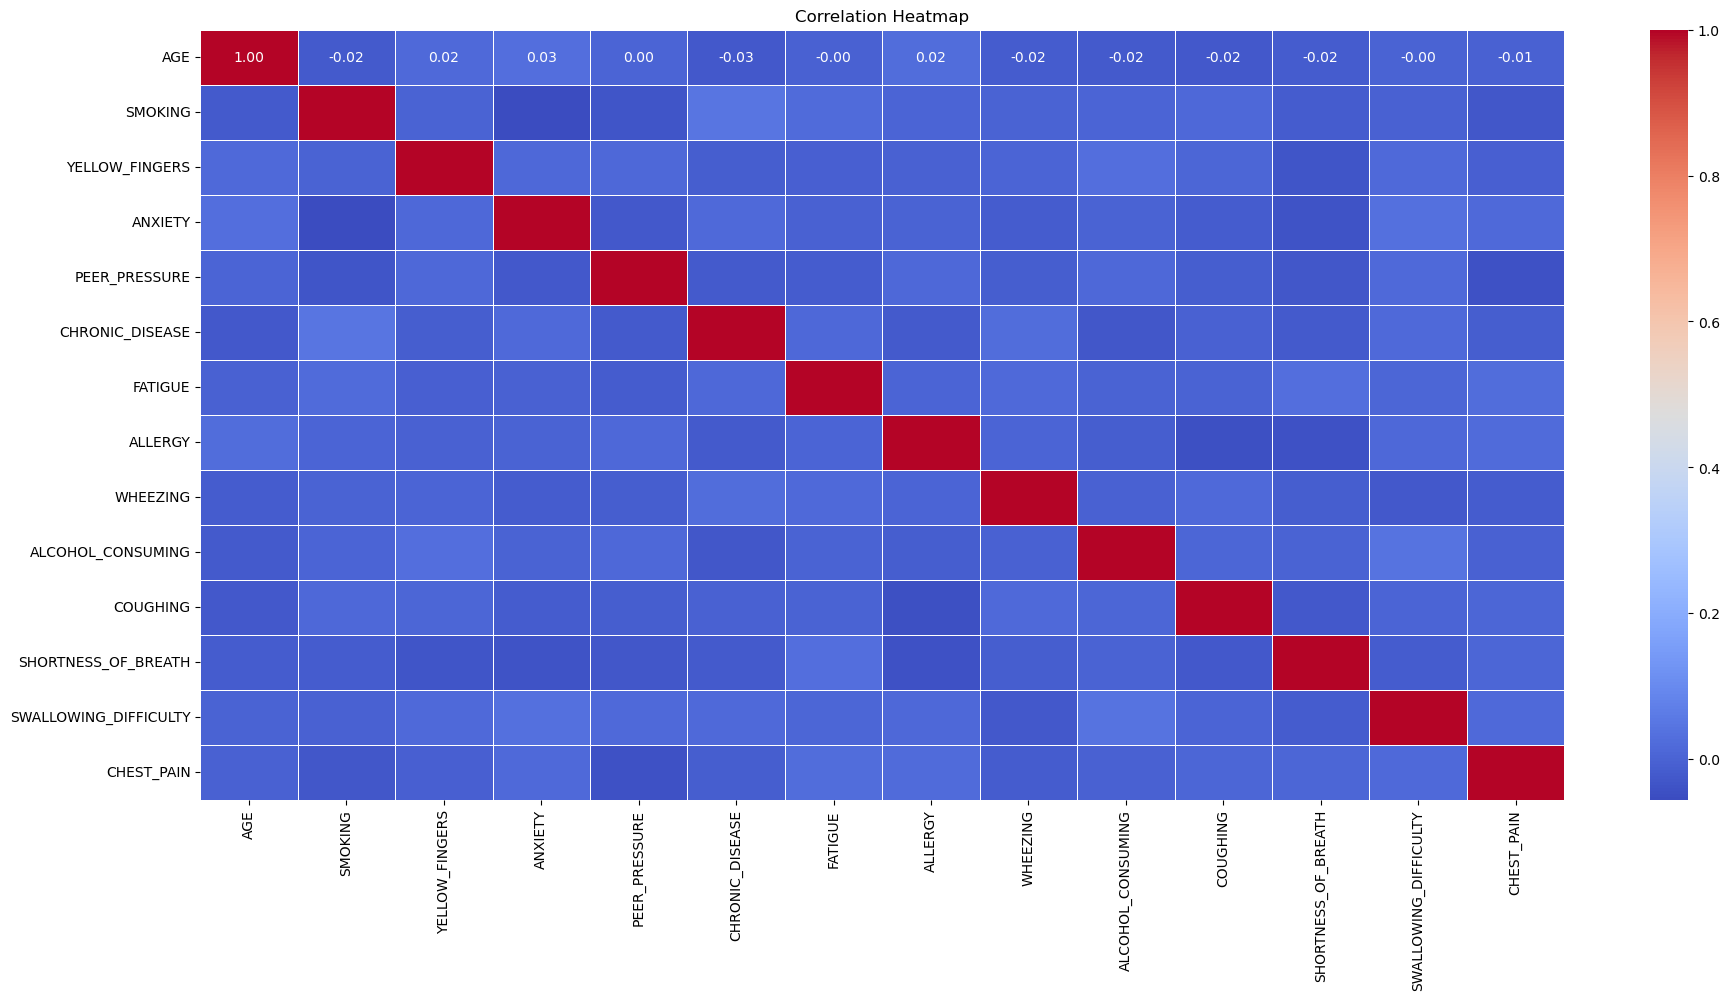

In [38]:
# Correlation heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(22, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

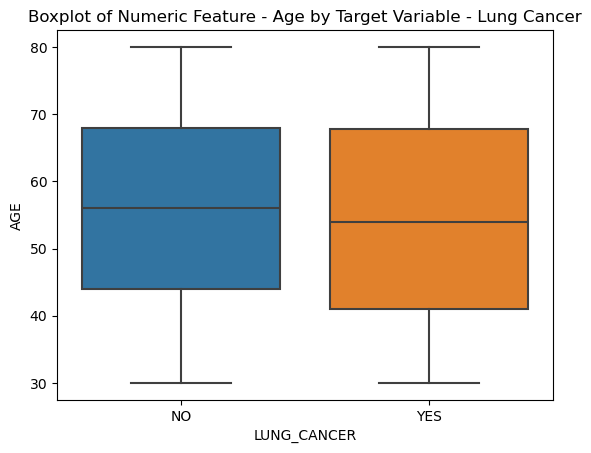

In [20]:
# Boxplot with Age
sns.boxplot(x='LUNG_CANCER', y='AGE', data=df)
plt.title('Boxplot of Numeric Feature - Age by Target Variable - Lung Cancer')
plt.show()

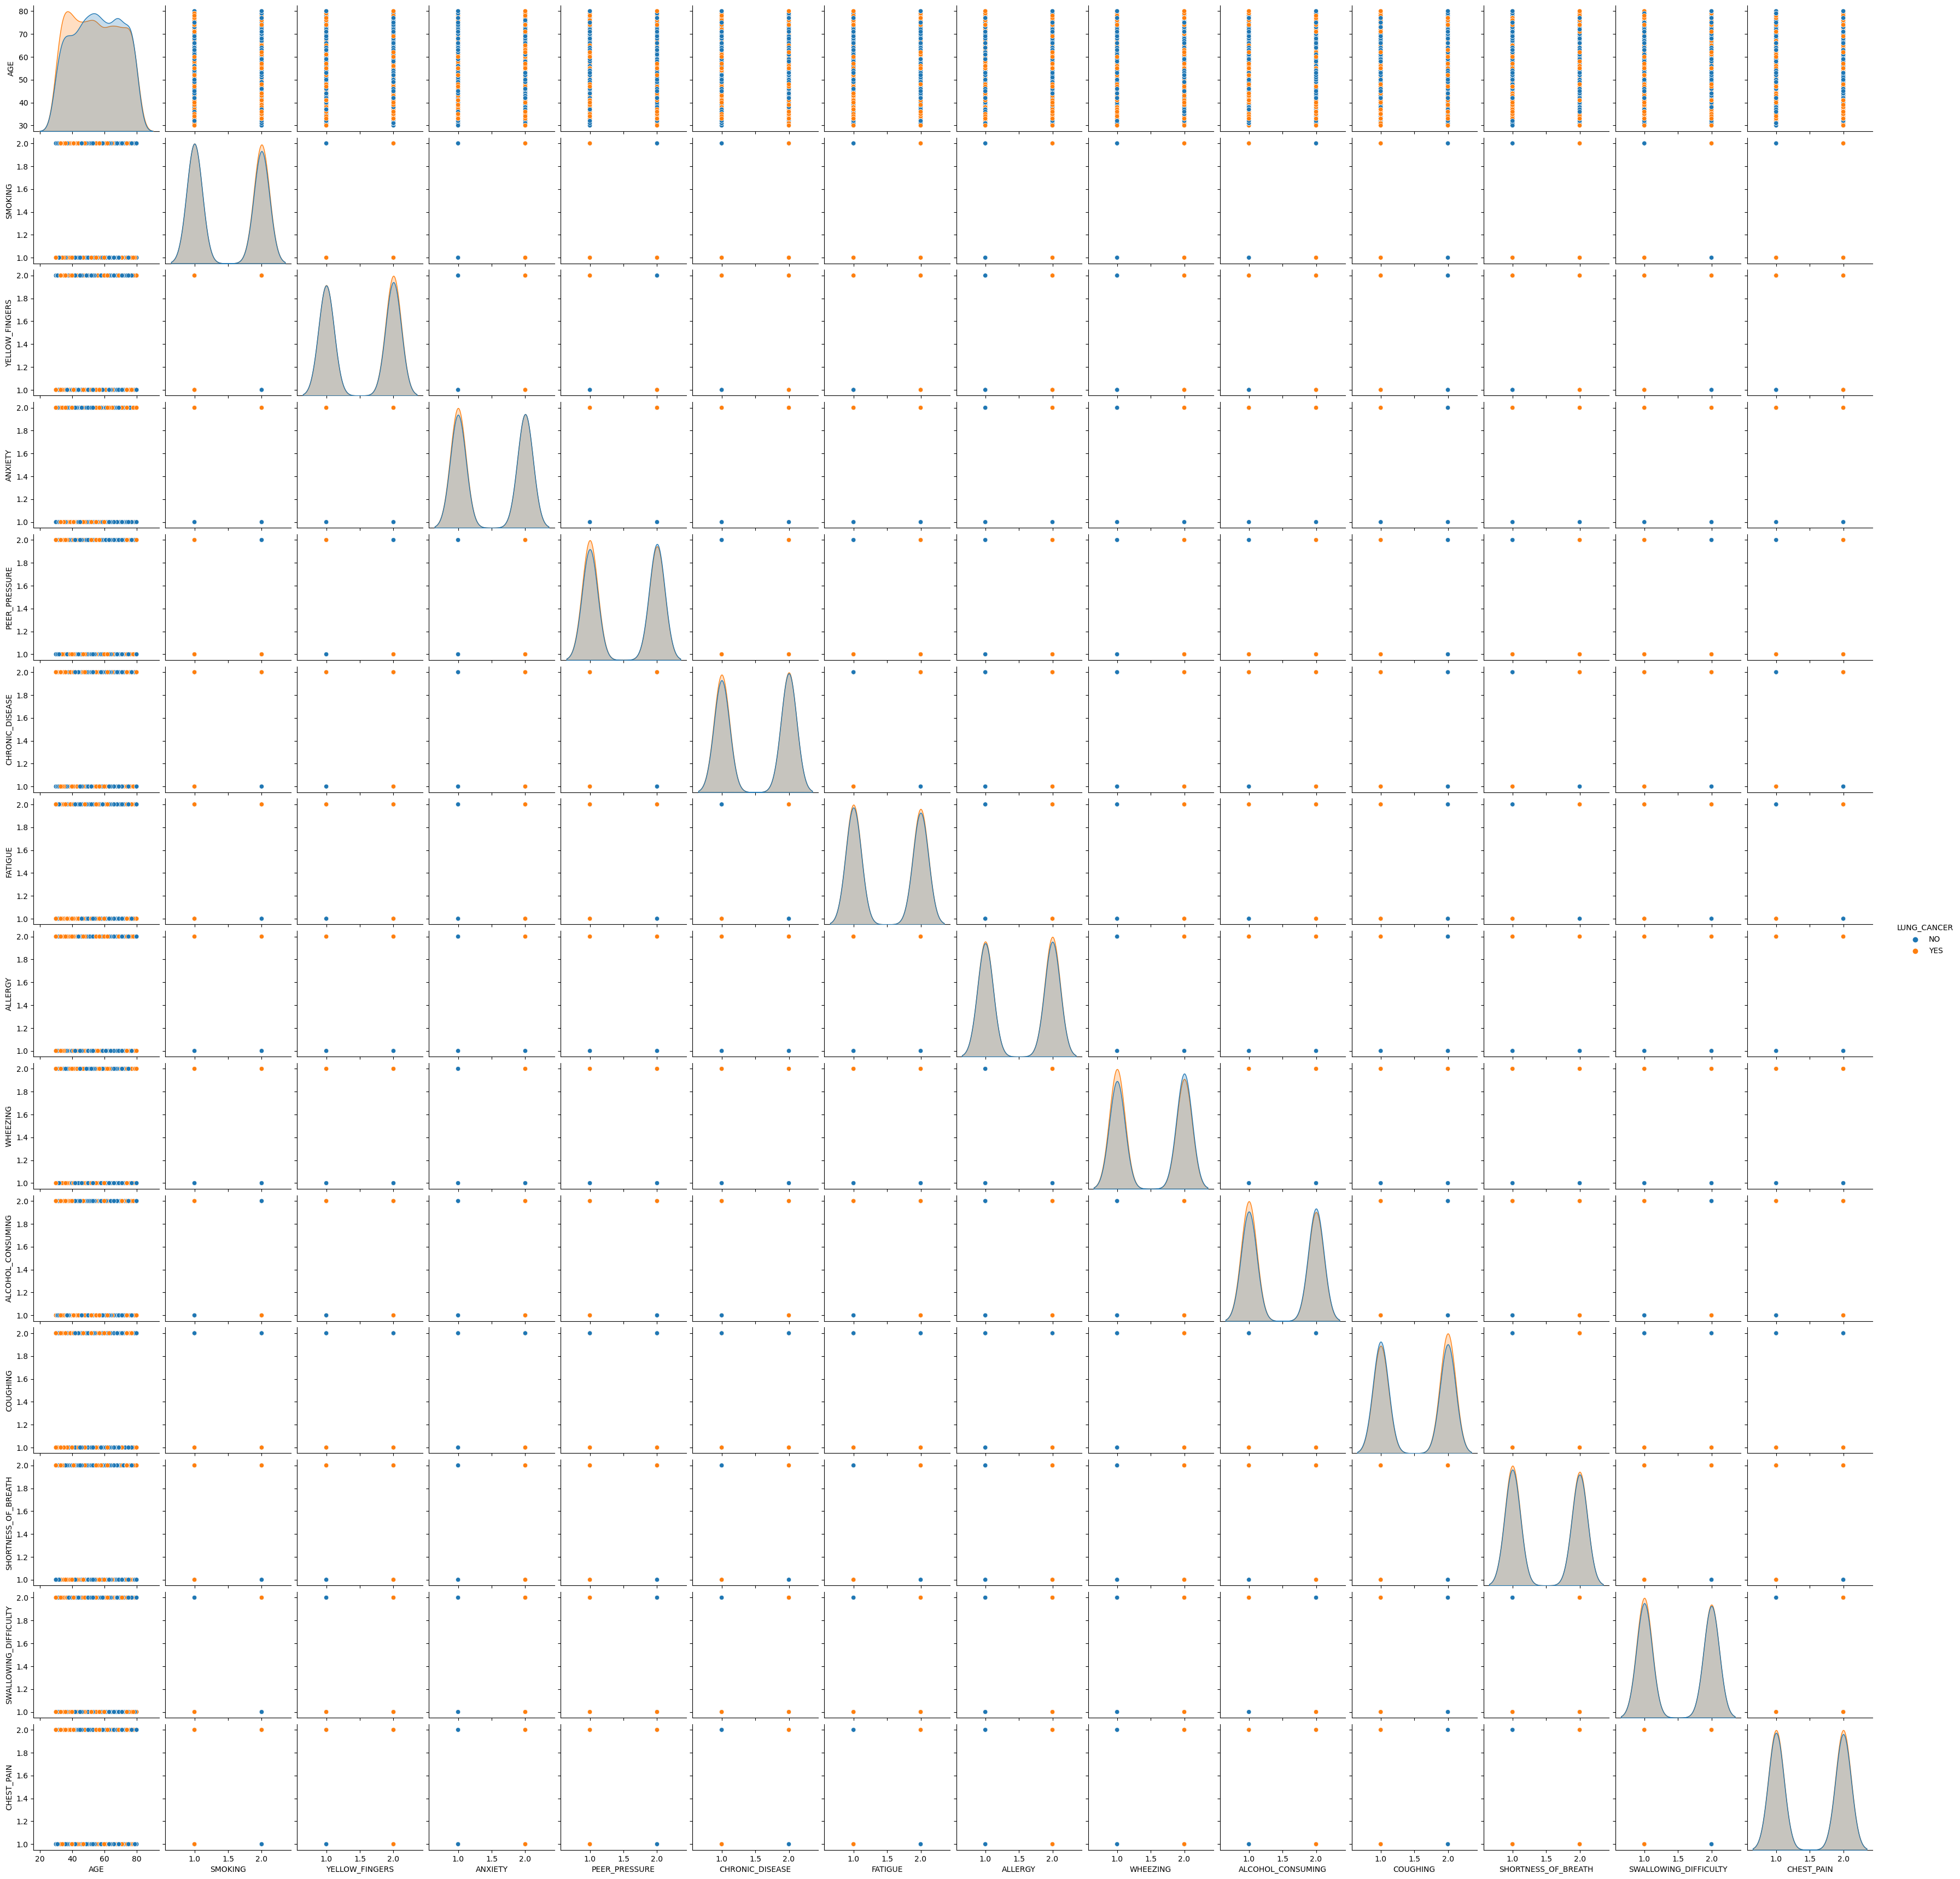

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

df['LUNG_CANCER'] = df['LUNG_CANCER'].astype('category')

# Select only numeric columns for pairplot
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Add the target column back for hue
numeric_df['LUNG_CANCER'] = df['LUNG_CANCER']

# Create pairplot
sns.pairplot(numeric_df, hue='LUNG_CANCER')
plt.show()
